In [13]:
import numpy as np
import matplotlib.pyplot as plt

performanceADI = []
simulationADI = []
current_section = None

with open('ADI200 Performance time.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # Switch sections when appropriate
        if line.startswith("##"):
            if "Performance time" in line:
                current_section = "performance"
            elif "Simulation time" in line:
                current_section = "simulation"
            continue
        # Skip title lines
        if line.startswith("ADI200"):
            continue
        # Parse lines like "0: 8757"
        if ':' in line:
            try:
                _, value = line.split(":", 1)
                num = int(value.strip())
                if current_section == "performance":
                    performanceADI.append(num)
                elif current_section == "simulation":
                    simulationADI.append(num)
            except ValueError:
                # Skip lines that don't match expected format
                continue

performanceADI = np.array(performanceADI)
simulationADI = np.array(simulationADI)


performanceFTCS = []
simulationFTCS = []
current_section = None

with open('FTCS200 Performance time.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # Switch sections when appropriate
        if line.startswith("##"):
            if "Performance time" in line:
                current_section = "performance"
            elif "Simulation time" in line:
                current_section = "simulation"
            continue
        # Skip title lines
        if line.startswith("FTCS200"):
            continue
        # Parse lines like "0: 8757"
        if ':' in line:
            try:
                _, value = line.split(":", 1)
                num = int(value.strip())
                if current_section == "performance":
                    performanceFTCS.append(num)
                elif current_section == "simulation":
                    simulationFTCS.append(num)
            except ValueError:
                # Skip lines that don't match expected format
                continue

performanceFTCS = np.array(performanceFTCS)
simulationFTCS = np.array(simulationFTCS)



/tmp/ipykernel_109346/3865451831.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([performanceFTCS, performanceADI], labels=["FTCS", "ADI"], notch=True, showfliers=False)


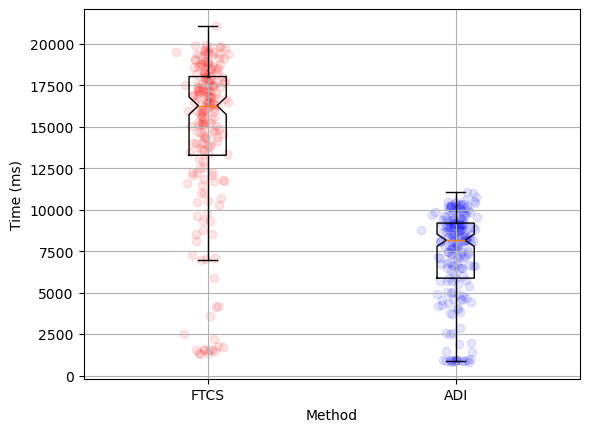

/tmp/ipykernel_109346/3865451831.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([simulationFTCS, simulationADI], labels=["FTCS", "ADI"],notch=True, showfliers=False)


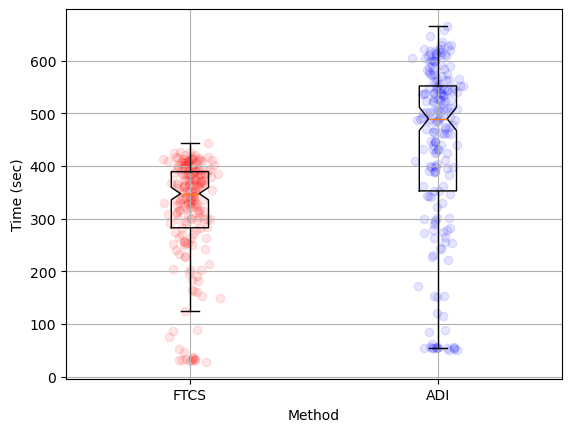

In [24]:
# Plotting performance times with scatter overlay
plt.figure()
plt.boxplot([performanceFTCS, performanceADI], labels=["FTCS", "ADI"], notch=True, showfliers=False)

# Add scatter points with jitter to avoid overlap
x_ftcs = np.random.normal(1, 0.04, size=len(performanceFTCS))
x_adi = np.random.normal(2, 0.04, size=len(performanceADI))
plt.scatter(x_ftcs, performanceFTCS, color='red', alpha=0.1)
plt.scatter(x_adi, performanceADI, color='blue', alpha=0.1)

plt.ylabel("Time (ms)")
plt.xlabel("Method")
plt.grid()
plt.show()

# Plotting simulation times with scatter overlay
plt.figure()
plt.boxplot([simulationFTCS, simulationADI], labels=["FTCS", "ADI"],notch=True, showfliers=False)

# Add scatter points with jitter to avoid overlap
x_ftcs_sim = np.random.normal(1, 0.04, size=len(simulationFTCS))
x_adi_sim = np.random.normal(2, 0.04, size=len(simulationADI))
plt.scatter(x_ftcs_sim, simulationFTCS, color='red', alpha=0.1)
plt.scatter(x_adi_sim, simulationADI, color='blue', alpha=0.1)

plt.ylabel("Time (sec)")
plt.xlabel("Method")
plt.grid()
plt.show()

Shapiro-Wilk test for FTCS performance: statistic=0.8328068838546911, p-value=6.763844500100738e-14
Shapiro-Wilk test for ADI performance: statistic=0.8782840661530082, p-value=1.2750109838834815e-11
Shapiro-Wilk test for FTCS simulation: statistic=0.824566767732857, p-value=2.920906979925815e-14
Shapiro-Wilk test for ADI simulation: statistic=0.8782827639823501, p-value=1.274797135661374e-11


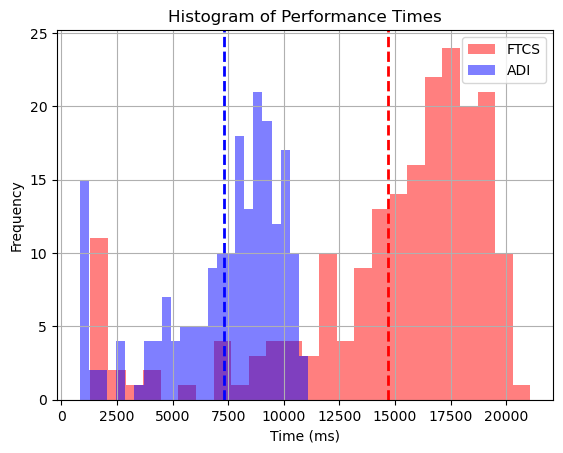

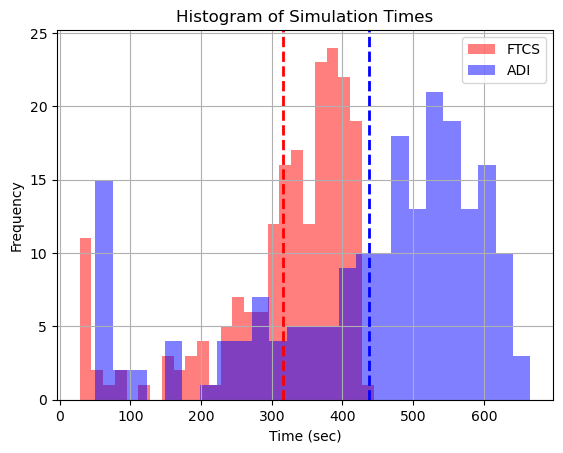

In [30]:
# lets do a t-test to see if the means are significantly different. But first we need to check if
# the data is normally distributed. We will use the Shapiro-Wilk test for normality
from scipy.stats import shapiro, ttest_ind
# Shapiro-Wilk test for normality
statistic_ftcs, p_value_ftcs = shapiro(performanceFTCS)
print(f"Shapiro-Wilk test for FTCS performance: statistic={statistic_ftcs}, p-value={p_value_ftcs}")
statistic_adi, p_value_adi = shapiro(performanceADI)
print(f"Shapiro-Wilk test for ADI performance: statistic={statistic_adi}, p-value={p_value_adi}")
# Shapiro-Wilk test for normality
statistic_ftcs_sim, p_value_ftcs_sim = shapiro(simulationFTCS)
print(f"Shapiro-Wilk test for FTCS simulation: statistic={statistic_ftcs_sim}, p-value={p_value_ftcs_sim}")
statistic_adi_sim, p_value_adi_sim = shapiro(simulationADI)
print(f"Shapiro-Wilk test for ADI simulation: statistic={statistic_adi_sim}, p-value={p_value_adi_sim}")

#Let's double check by doing a histogram
plt.figure()
plt.hist(performanceFTCS, bins=25, alpha=0.5, color='red', label='FTCS')
plt.hist(performanceADI, bins=25, alpha=0.5, color='blue', label='ADI')
plt.title('Histogram of Performance Times')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
#show the mean as a vertical line
plt.axvline(np.mean(performanceFTCS), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(performanceADI), color='blue', linestyle='dashed', linewidth=2)
plt.show()
plt.figure()
plt.hist(simulationFTCS, bins=25, alpha=0.5, color='red', label='FTCS')
plt.hist(simulationADI, bins=25, alpha=0.5, color='blue', label='ADI')
plt.title('Histogram of Simulation Times')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.axvline(np.mean(simulationFTCS), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(simulationADI), color='blue', linestyle='dashed', linewidth=2)
plt.show()

In [31]:
# Now that we know that the data is not normally distributed, we will use the Mann-Whitney U test 
#The Mann–Whitney U test is a widely used non-parametric statistical method designed to compare two 
# independent samples by assessing whether they come from the same population in terms of central 
# tendency or overall distribution. This test is particularly useful when the assumptions of the independent 
# samples t-test (such as normality) cannot be met, making it applicable to distributions that are skewed 
# or ordinal in nature

from scipy.stats import mannwhitneyu
# Mann-Whitney U test for performance times
statistic_mw, p_value_mw = mannwhitneyu(performanceFTCS, performanceADI)
print(f"Mann-Whitney U test for performance times: statistic={statistic_mw}, p-value={p_value_mw}")
# Mann-Whitney U test for simulation times
statistic_mw_sim, p_value_mw_sim = mannwhitneyu(simulationFTCS, simulationADI)
print(f"Mann-Whitney U test for simulation times: statistic={statistic_mw_sim}, p-value={p_value_mw_sim}")


Mann-Whitney U test for performance times: statistic=35885.5, p-value=5.8751563472593726e-43
Mann-Whitney U test for simulation times: statistic=8933.0, p-value=1.047970146180683e-21
